# Wrapability Analysis
<hr style="border:3px solid gray"> </hr>

## Project Objective & Deliverables
Identify the zenith threshold for length and width setpoints.

## Defining Constraints
1. Original Turtles
    1. Former Width: <i>47 mm</i>
    2. 3 pc. Wrapper Length (Knife Radius): <i>144 mm</i>
    3. 4 pc. Wrapper Length (Knife Radius): <i>192</i>
    4. Maximum Turtle Width (Equal Distributed): <i>48 mm</i>
2. Bite Size Turtles
    1. Former Width: <i>46 mm</i>
    2. 3 pc. Wrapper Length (Knife Radius): <i>Unkown</i>
    3. 4 pc. Wrapper Length (Knife Radius): <i>152 mm</i>
    4. Maximum Turtle Width (Equal Distributed): <i>38 mm</i>

<hr style="border:2px solid gray"> </hr>

# Key Take Aways at Sigs
<i>Either our length setting is too strict on Original or too lenient on Bite.</i>
<ol>
    <li>We are losing roughly 1.9039% of our <b>Original</b> product due to length.</li>
    <li>We are losing roughly 0.0009% of our <b>Original</b> product due to width.</li>
    <li>We are losing roughly 0.0% of our <b>Original</b> product due to height.</li>
    <li>We are losing roughly 1.0934% of our <b>Bite</b> product due to length.</li>
    <li>We are losing roughly 0.4104% of our <b>Bite</b> product due to width.</li>
    <li>We are losing roughly 0.0198% of our <b>Bite</b> product due to height</li>
    <li>For all product formats, to set maximum turtle width, minus the setpoint from 78.</li>
    <li>For all product formats, to set maximum turtle height, add the setpoint and 2.</li>
</ol>

## 3D Profile Setpoint Conversion Tables
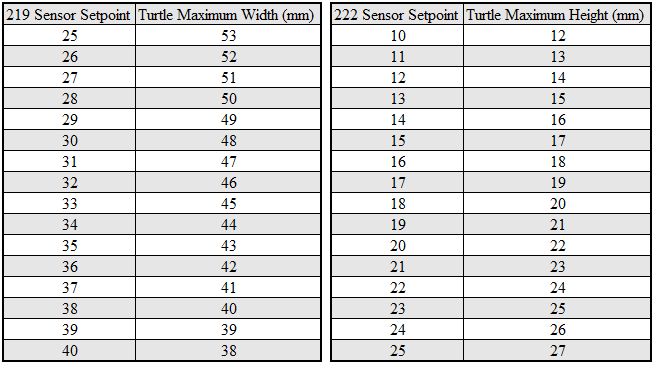

<hr style="border:2px solid gray"> </hr>

## Import Moduels & Data

In [1]:
# Import pertinent modules.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import shapiro
from scipy.stats import normaltest

In [2]:
base_data = pd.read_excel('QA_Turtle_Measurement_Observations.xlsx','QA_Turtle_Measurements_Archive')
base_data = base_data[base_data['Date'] > '2020-04-22 06:58']
base_data['Height (mm)'] = pd.to_numeric(base_data['Height (mm)'],errors='raise')
regular = base_data[(base_data['SKU'] == '8000035') | (base_data['SKU'] == 8000035)]
bite = base_data[(base_data['SKU'] == '8000038') | (base_data['SKU'] == 8000038)]

## Build 3D Profile Setpoint Model

In [3]:
# The laser intersects the belt at setpoint 33, the belt is 45 mm; therefore, at setpoint 78, the turtle maximum width is 0.
base_width = 45 + 33
width_dic = {}

for i in range(25,41):
    width_dic[i] = base_width - i

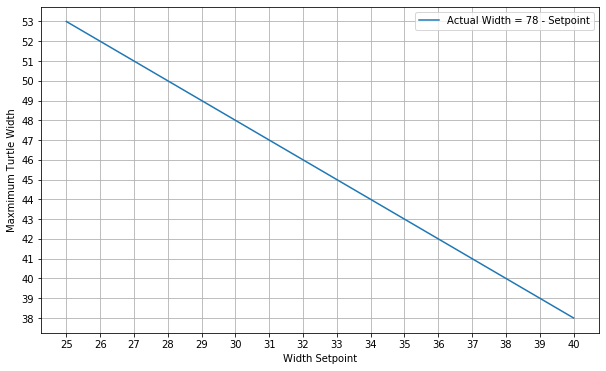

In [4]:
width_setpoint = list(width_dic.keys())
width_actual = list(width_dic.values())
plt.figure(figsize=(10,6))
plt.plot(width_setpoint,width_actual, label='Actual Width = ' + str(base_width) + ' - Setpoint')
plt.xlabel('Width Setpoint')
plt.ylabel('Maxmimum Turtle Width')
plt.yticks(np.arange(min(width_actual), max(width_actual)+1, 1))
plt.xticks(np.arange(min(width_setpoint), max(width_setpoint)+1, 1))
plt.grid()
plt.legend()
plt.show()

In [5]:
# The belt is 2 mm tall.
base_height = 2
height_dic = {}

for i in range(10,20):
    height_dic[i] = base_height + i

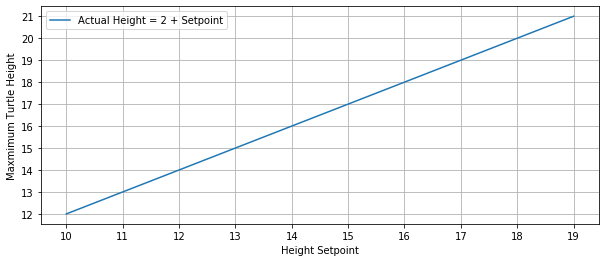

In [6]:
height_setpoint = list(height_dic.keys())
height_actual = list(height_dic.values())
plt.figure(figsize=(10,4))
plt.plot(height_setpoint,height_actual, label='Actual Height = ' + str(base_height) + ' + Setpoint' )
plt.xlabel('Height Setpoint')
plt.ylabel('Maxmimum Turtle Height')
plt.yticks(np.arange(min(height_actual), max(height_actual)+1, 1))
plt.xticks(np.arange(min(height_setpoint), max(height_setpoint)+1, 1))
plt.grid()
plt.legend()
plt.show()

<hr style="border:2px solid gray"> </hr>

## How does this apply to us?

#### BOSCH & Operators agreed to recommended these setpoints:
1. Original Turtles
    1. Maximum Turtle Width: <i>47 mm</i></i>
    2. Maximum Turtle Length: <i>48 mm</i>
    3. Maximum Turtle Height: <i>21 mm</i>
2. Bite Size Turtles
    1. Maximum Turtle Width: <i>43 mm</i>
    2. Maximum Turtle Length: <i>45 mm</i>
    3. Maximum Turtle Height: <i>17 mm</i>

<hr></hr>

## Original Turtles

In [7]:
regular[['Width (mm)','Length (mm)', 'Height (mm)']].describe()

,Width (mm),Length (mm),Height (mm)
count,3000.000000,3000.000000,3000.000000
mean,38.471777,43.325043,15.823633
std,2.225562,2.730050,0.853680
min,31.500000,36.290000,11.670000
25%,36.917500,41.310000,15.250000
50%,38.470000,43.040000,15.790000
75%,39.970000,44.972500,16.340000
max,45.870000,55.080000,19.480000


### Original Spread

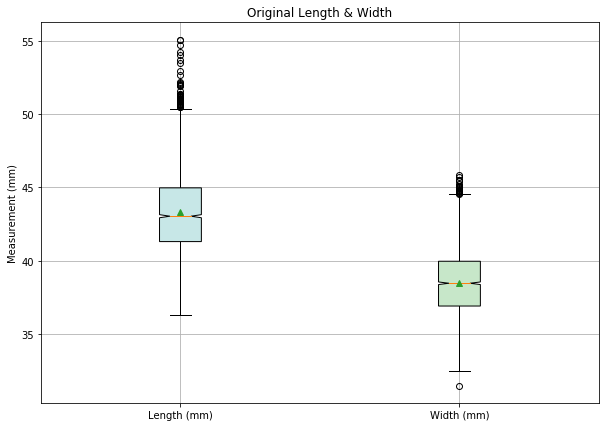

In [8]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Original Length & Width')
box = ax.boxplot([regular['Length (mm)'], regular['Width (mm)']],
           labels=['Length (mm)', 'Width (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.grid()
colors = ['#C7E7E7','#C7E7C9']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

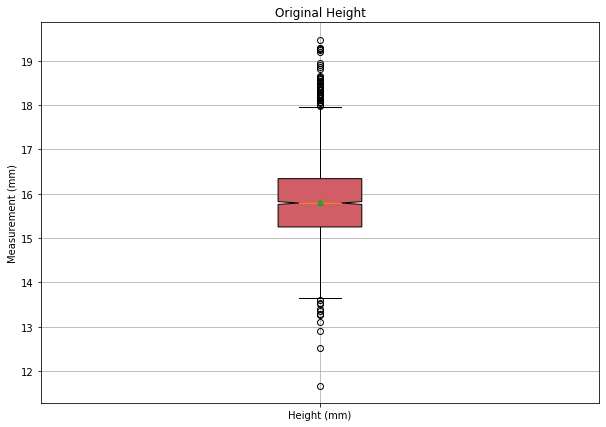

In [9]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Original Height')
box = ax.boxplot([regular['Height (mm)']],
           labels=['Height (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.grid()
colors = ['#D15E67']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [10]:
# Normalize Regular Turtle Length, Width, & Height
regular = regular[(regular['Length (mm)'] < regular['Length (mm)'].quantile(0.97))]
regular = regular[(regular['Width (mm)'] < regular['Width (mm)'].quantile(0.97))]
regular = regular[(regular['Height (mm)'] < regular['Height (mm)'].quantile(0.98))]
regular = regular[(regular['Height (mm)'] > regular['Height (mm)'].quantile(0.02))]

### Original Wrapability

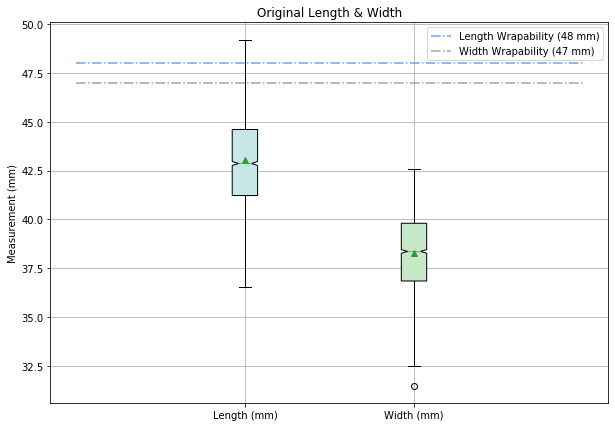

In [11]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Original Length & Width')
box = ax.boxplot([regular['Length (mm)'], regular['Width (mm)']],
           labels=['Length (mm)', 'Width (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.hlines(48,xmin=0,xmax=3,linestyles='dashdot',colors='#66a3ff',label='Length Wrapability (48 mm)')
plt.hlines(width_dic[31],xmin=0,xmax=3,linestyles='dashdot',colors='#9CA99D',label='Width Wrapability (' 
           + str(width_dic[31]) + ' mm)')

plt.grid()
colors = ['#C7E7E7','#C7E7C9']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

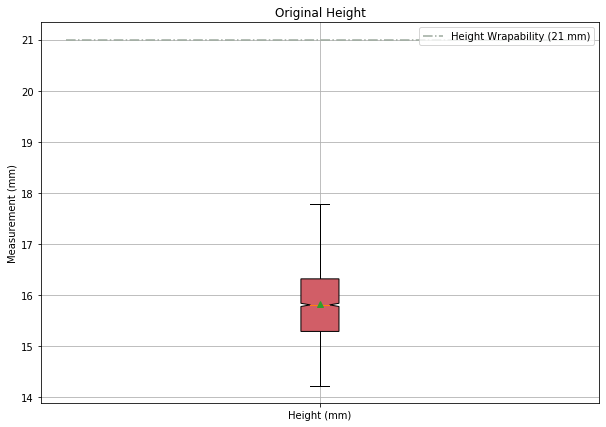

In [12]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Original Height')
box = ax.boxplot([regular['Height (mm)']],
           labels=['Height (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.hlines(height_dic[19],xmin=0,xmax=2,linestyles='dashdot',colors='#9CA99D',label='Height Wrapability (' 
           + str(height_dic[19]) + ' mm)')

plt.grid()
colors = ['#D15E67']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

In [13]:
print('We are losing roughly ' + str(round(((1-norm(regular['Length (mm)'].mean(),regular['Length (mm)'].std()).cdf(48))*100),4))
      + '% of our Original product due to length.')
print('We are losing roughly ' + str(round(((1-norm(regular['Width (mm)'].mean(),regular['Width (mm)'].std()).cdf(47))*100),4))
      + '% of our Original product due to width.')
print('We are losing roughly ' + str(round(((1-norm(regular['Height (mm)'].mean(),regular['Height (mm)'].std()).cdf(21))*100),4))
      + '% of our Original product due to height.')

We are losing roughly 1.9039% of our Original product due to length.
We are losing roughly 0.0009% of our Original product due to width.
We are losing roughly 0.0% of our Original product due to height.


In [14]:
propensity_origianl_too_large = 1-(norm(regular['Length (mm)'].mean(),regular['Length (mm)'].std()).cdf(48))
propensity_original_too_large_two_or_more = (1-binom.cdf(1,3,propensity_origianl_too_large))
print('The probability of wrapping 2 or more turtles, in a 3 pc. bar, that are greater than 48 mm is: ' +
     str(round((propensity_original_too_large_two_or_more * 100),3)) + '%.')

The probability of wrapping 2 or more turtles, in a 3 pc. bar, that are greater than 48 mm is: 0.107%.


We should assume the risk and open the length sensor. If we leave the length sensor, there is 0% chance that a turtle will pass the 3D profile station. When rework occurs, the turtle will be reject again. Applicably, we have roughly 2.0% of Orginial turtles greater than 48 mm; thus, we will see roughly 2.0% of our turtles rejected after rework. The chances of two or more turtles that are greater than 48 mm is roughly 0.107%; therefore, we should loosen our length sensor to allow ou 48 mm turtles through.
---

<hr style="border:2px solid gray"> </hr>

## Bite Turtles

In [15]:
bite[['Width (mm)','Length (mm)', 'Height (mm)']].describe()

,Width (mm),Length (mm),Height (mm)
count,1249.000000,1249.000000,1249.000000
mean,33.763827,37.860248,14.680841
std,1.867958,2.624444,0.757294
min,27.770000,31.800000,12.080000
25%,32.590000,36.020000,14.170000
50%,33.720000,37.630000,14.690000
75%,34.920000,39.490000,15.140000
max,41.520000,50.670000,18.250000


### Bite Spread

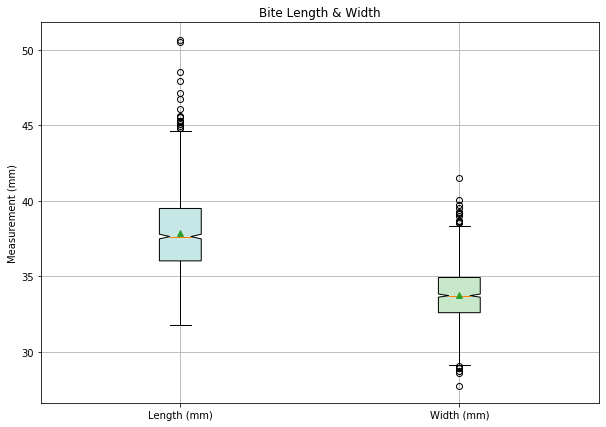

In [16]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Bite Length & Width')
box = ax.boxplot([bite['Length (mm)'], bite['Width (mm)']],
           labels=['Length (mm)', 'Width (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.grid()
colors = ['#C7E7E7','#C7E7C9']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

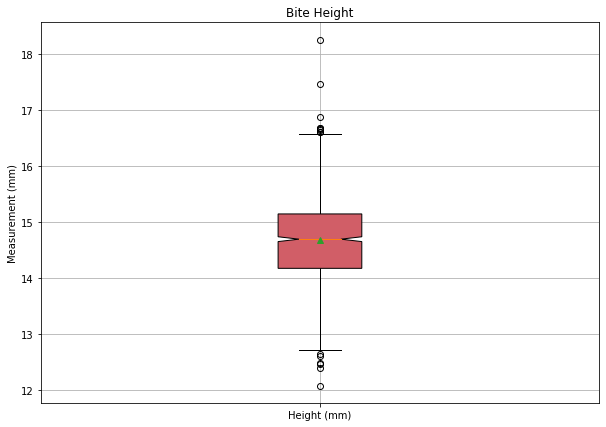

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Bite Height')
box = ax.boxplot([bite['Height (mm)']],
           labels=['Height (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.grid()
colors = ['#D15E67']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [18]:
### Original Wrapability# Normalize Regular Turtle Length, Width, & Height
bite = bite[(bite['Length (mm)'] < bite['Length (mm)'].quantile(0.98))]
bite = bite[(bite['Width (mm)'] < bite['Width (mm)'].quantile(0.98))]
bite = bite[(bite['Width (mm)'] > bite['Width (mm)'].quantile(0.02))]
bite = bite[(bite['Height (mm)'] < bite['Height (mm)'].quantile(0.98))]
bite = bite[(bite['Height (mm)'] > bite['Height (mm)'].quantile(0.02))]

### Bite Wrapability

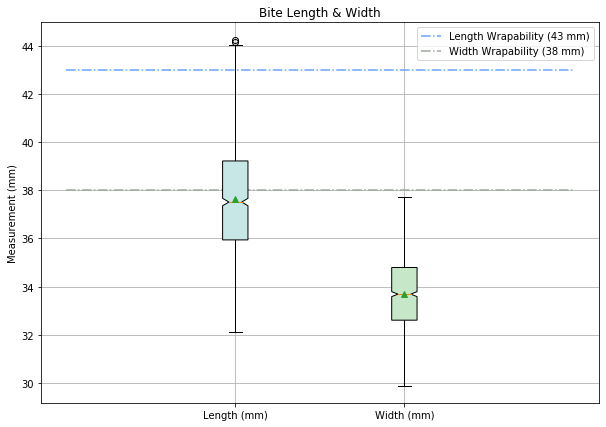

In [19]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Bite Length & Width')
box = ax.boxplot([bite['Length (mm)'], bite['Width (mm)']],
           labels=['Length (mm)', 'Width (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.hlines(43,xmin=0,xmax=3,linestyles='dashdot',colors='#66a3ff',label='Length Wrapability (43 mm)')
plt.hlines(width_dic[40],xmin=0,xmax=3,linestyles='dashdot',colors='#9CA99D',label='Width Wrapability ('
           + str(width_dic[40]) + ' mm)')

plt.grid()
colors = ['#C7E7E7','#C7E7C9']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

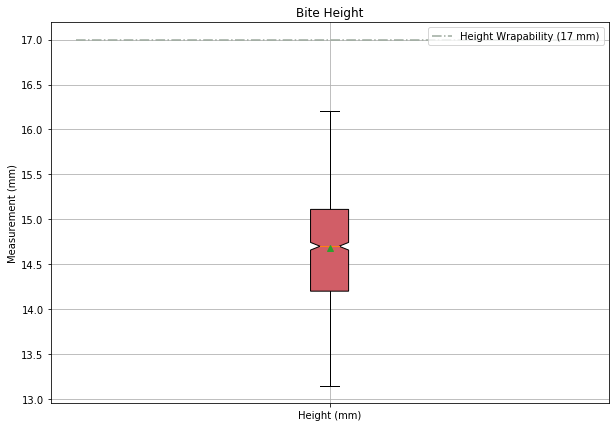

In [20]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Bite Height')
box = ax.boxplot([bite['Height (mm)']],
           labels=['Height (mm)'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')

plt.hlines(height_dic[15],xmin=0,xmax=2,linestyles='dashdot',colors='#9CA99D',label='Height Wrapability (' 
           + str(height_dic[15]) + ' mm)')

plt.grid()
colors = ['#D15E67']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

In [21]:
print('We are losing roughly ' + str(round(((1-norm(bite['Length (mm)'].mean(),bite['Length (mm)'].std()).cdf(43))*100),4))
      + '% of our Bite product due to length.')
print('We are losing roughly ' + str(round(((1-norm(bite['Width (mm)'].mean(),bite['Width (mm)'].std()).cdf(38))*100),4))
      + '% of our Bite product due to width.')
print('We are losing roughly ' + str(round(((1-norm(bite['Height (mm)'].mean(),bite['Height (mm)'].std()).cdf(17))*100),4))
      + '% of our Bite product due to height.')

We are losing roughly 1.0934% of our Bite product due to length.
We are losing roughly 0.4104% of our Bite product due to width.
We are losing roughly 0.0198% of our Bite product due to height.


On average, we produce 8% waste when running Bite; moreover, 50% of the waste is generated at the flow wrapper. Hence, the flow wrapper generates 4% waste, on average. The turtle size contributes roughly 2% waste, while the remaining percentage is generated during adverse scenarios throughout the shift.